In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('Rotten Tomatoes Movies.csv')

data

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2/12/2010,6/29/2010,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",4/30/2010,10/19/2010,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",10/5/1979,8/27/1997,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",4/13/1957,3/6/2001,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1/1/1954,5/20/2003,127.0,Disney,Fresh,89,27,74.0,68860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",10/2/1981,5/27/2003,104.0,MCA Universal Home Video,Rotten,56,9,74.0,1192.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",3/4/2016,6/7/2016,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0,100946.0
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",12/17/1964,8/3/2004,142.0,Fox,Fresh,78,9,87.0,7126.0
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",NaN,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",6/17/1964,2/2/2001,139.0,Paramount Pictures,Fresh,95,21,91.0,30170.0


In [2]:

print("Dataset Description:")
print(f"Number of features: {len(data.columns)}")
print("\nFeature data types:")
print(data.dtypes)
print(f"There are {data.size} Data Points")
print(f"\nDataset size (rows, columns): {data.shape}")
print(data.head())


Dataset Description:
Number of features: 17

Feature data types:
movie_title            object
movie_info             object
critics_consensus      object
rating                 object
genre                  object
directors              object
writers                object
cast                   object
in_theaters_date       object
on_streaming_date      object
runtime_in_minutes    float64
studio_name            object
tomatometer_status     object
tomatometer_rating      int64
tomatometer_count       int64
audience_rating       float64
audience_count        float64
dtype: object
There are 282846 Data Points

Dataset size (rows, columns): (16638, 17)
                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

  

In [3]:
data['tomatometer_status'].value_counts()

tomatometer_status
Rotten             7233
Fresh              6448
Certified Fresh    2957
Name: count, dtype: int64

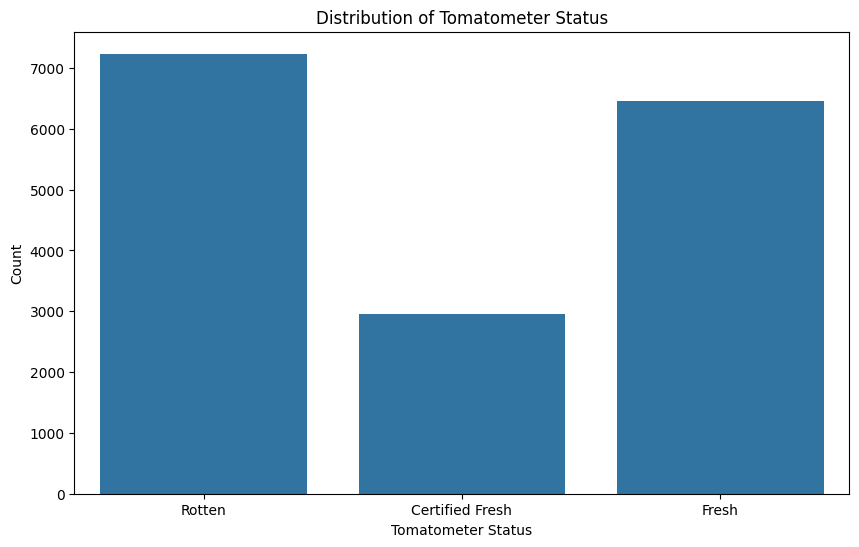

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='tomatometer_status', data=data)
plt.title('Distribution of Tomatometer Status')
plt.xlabel('Tomatometer Status')
plt.ylabel('Count')
plt.show()

In [5]:
data.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
audience_count         252
dtype: int64

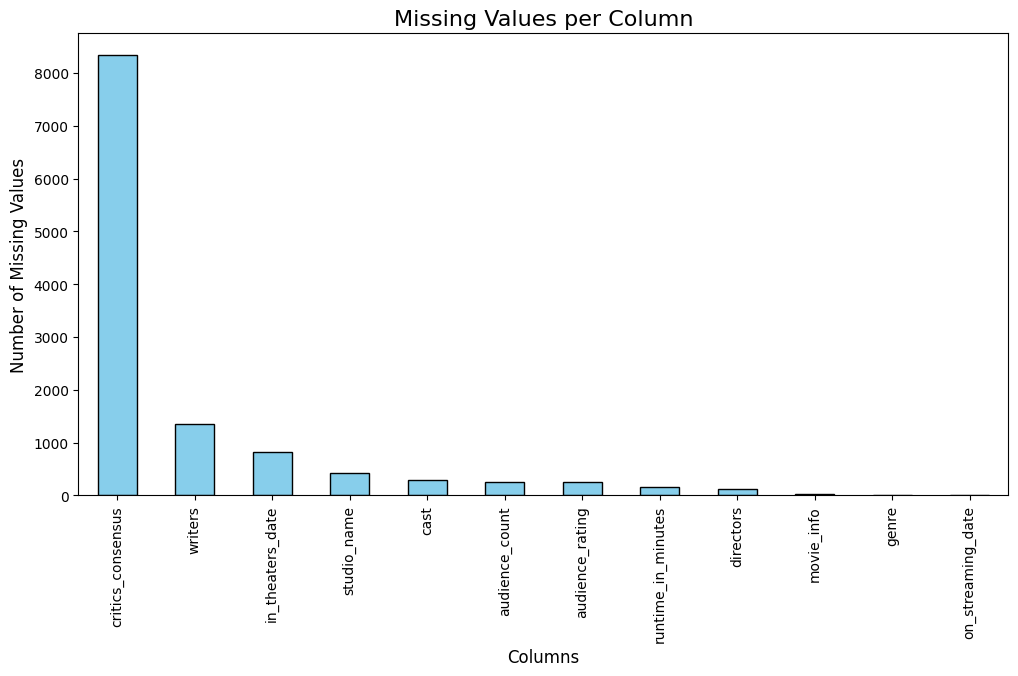

In [6]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)


plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Missing Values per Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.show()



In [7]:
data.drop(columns=['critics_consensus'],inplace=True)


In [8]:
data['movie_info'].fillna(data['movie_info'].mode()[0], inplace=True)
data['genre'].fillna(data['genre'].mode()[0], inplace=True)
data['directors'].fillna(data['directors'].mode()[0], inplace=True)
data['writers'].fillna(data['writers'].mode()[0], inplace=True)
data['cast'].fillna(data['cast'].mode()[0], inplace=True)
data['in_theaters_date'].fillna(data['in_theaters_date'].mode()[0], inplace=True)
data['on_streaming_date'].fillna(data['on_streaming_date'].mode()[0], inplace=True)
data['runtime_in_minutes'].fillna(data['runtime_in_minutes'].mode()[0], inplace=True)
data['studio_name'].fillna(data['studio_name'].mode()[0], inplace=True)
data['audience_rating'].fillna(data['audience_rating'].mode()[0], inplace=True)
data['audience_count'].fillna(data['audience_count'].mode()[0], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27608\2253975949.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['movie_info'].fillna(data['movie_info'].mode()[0], inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27608\2253975949.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [9]:
data.isnull().sum()


movie_title           0
movie_info            0
rating                0
genre                 0
directors             0
writers               0
cast                  0
in_theaters_date      0
on_streaming_date     0
runtime_in_minutes    0
studio_name           0
tomatometer_status    0
tomatometer_rating    0
tomatometer_count     0
audience_rating       0
audience_count        0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
data['rating_enc'] = enc.fit_transform(data['rating'])
data['genre_enc'] = enc.fit_transform(data['genre'])
data['tomatometer_status_enc'] = enc.fit_transform(data['tomatometer_status'])
data


,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,rating_enc,genre_enc,tomatometer_status_enc
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2/12/2010,6/29/2010,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0,3,217,2
1,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",4/30/2010,10/19/2010,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0,5,752,0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",10/5/1979,8/27/1997,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0,5,860,1
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",4/13/1957,3/6/2001,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0,2,689,0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1/1/1954,5/20/2003,127.0,Disney,Fresh,89,27,74.0,68860.0,0,286,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",10/2/1981,5/27/2003,104.0,MCA Universal Home Video,Rotten,56,9,74.0,1192.0,5,987,2
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",3/4/2016,6/7/2016,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0,100946.0,3,15,0
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NR,"Action & Adventure, Art House & International,...",Alfred Hitchcock,Woody Allen,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",12/17/1964,8/3/2004,142.0,Fox,Fresh,78,9,87.0,7126.0,2,59,1
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",6/17/1964,2/2/2001,139.0,Paramount Pictures,Fresh,95,21,91.0,30170.0,3,689,1


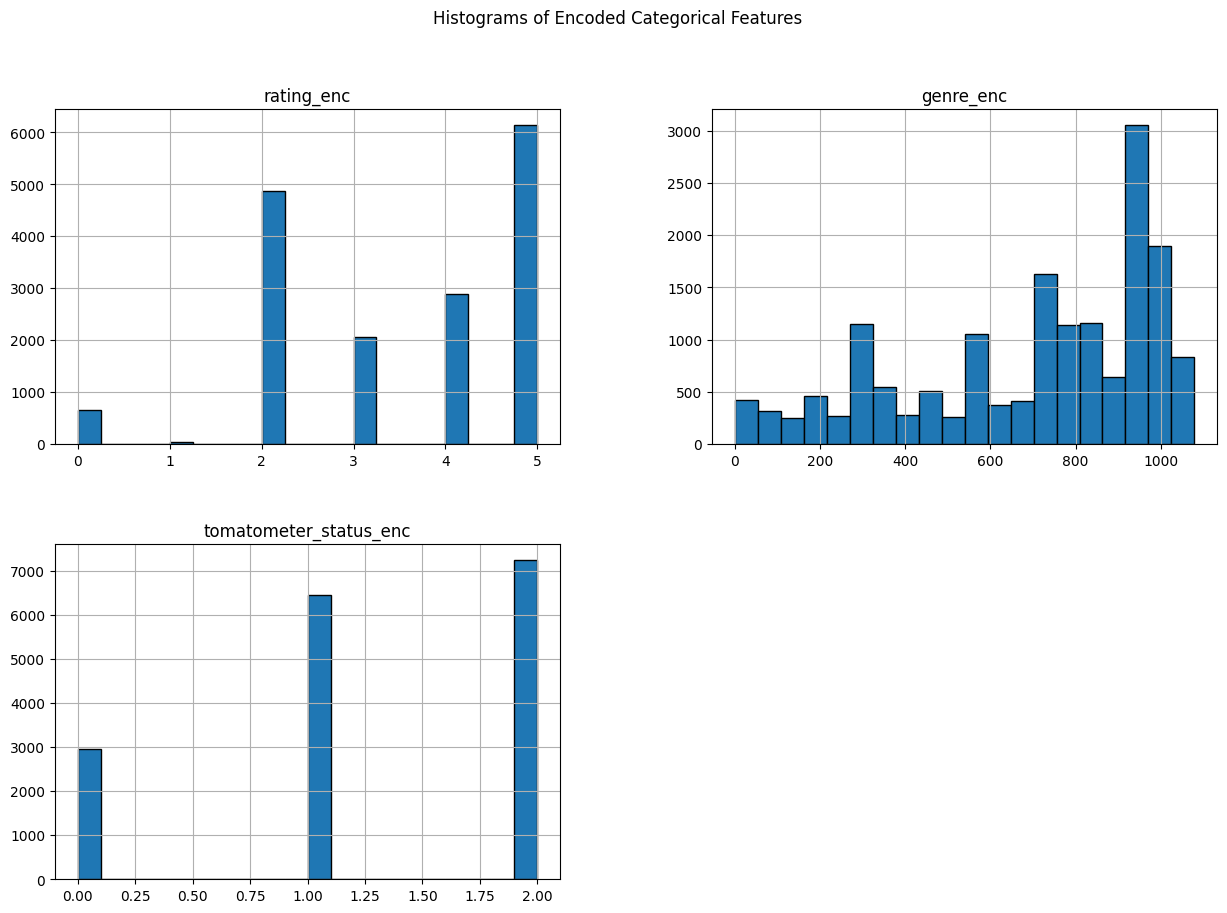

In [11]:
encoded_features = ['rating_enc', 'genre_enc', 'tomatometer_status_enc']

data[encoded_features].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Encoded Categorical Features')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,mean_squared_error, roc_auc_score


X = data[['genre_enc','tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count','runtime_in_minutes','rating_enc']]
y = data['tomatometer_status_enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
model_knn = KNeighborsClassifier(n_neighbors=200)
model_knn.fit(X_train, y_train)

y_pred = model_knn.predict(X_test)

In [14]:

accuracy_knn = accuracy_score(y_test, y_pred)
accuracy_knn

0.5430689102564102

In [15]:
mse_knn = mean_squared_error(y_test, y_pred)
print(mse_knn)

0.8331330128205128


In [16]:
rmse_knn = np.sqrt(mse_knn)
print(rmse_knn)

0.9127612025171276


In [17]:

y_pred_proba = model_knn.predict_proba(X_test)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(roc_auc_knn)


0.7069501245649684


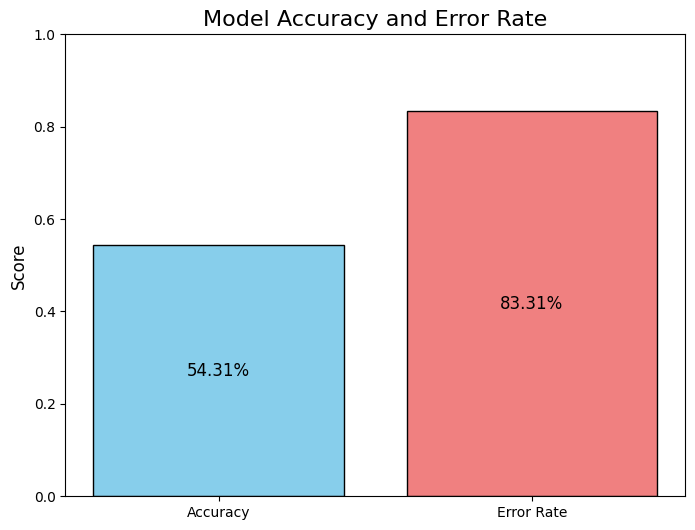

In [18]:
metrics = ['Accuracy', 'Error Rate']
values = [accuracy_knn, mse_knn]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=colors, edgecolor='black')
plt.title('Model Accuracy and Error Rate', fontsize=16)
plt.ylabel('Score', fontsize=12)

for i, value in enumerate(values):
    plt.text(i, value / 2, f'{value:.2%}', ha='center', va='center', fontsize=12, color='black')

plt.ylim(0, 1)
plt.show()

In [19]:
precision_knn = precision_score(y_test, y_pred, average='weighted')
print(precision_knn)

0.5390728600842573


In [20]:
recall_knn = recall_score(y_test, y_pred, average='weighted')
print(recall_knn)

0.5430689102564102


In [21]:
f1_knn = f1_score(y_test, y_pred, average='weighted')
print(f1_knn)

0.501505704380717


In [22]:
class_report = classification_report(y_test, y_pred)

print("Classification Report:\n")
print(class_report)


Classification Report:

              precision    recall  f1-score   support

           0       0.52      0.05      0.09       900
           1       0.56      0.66      0.61      1925
           2       0.53      0.64      0.58      2167

    accuracy                           0.54      4992
   macro avg       0.54      0.45      0.42      4992
weighted avg       0.54      0.54      0.50      4992



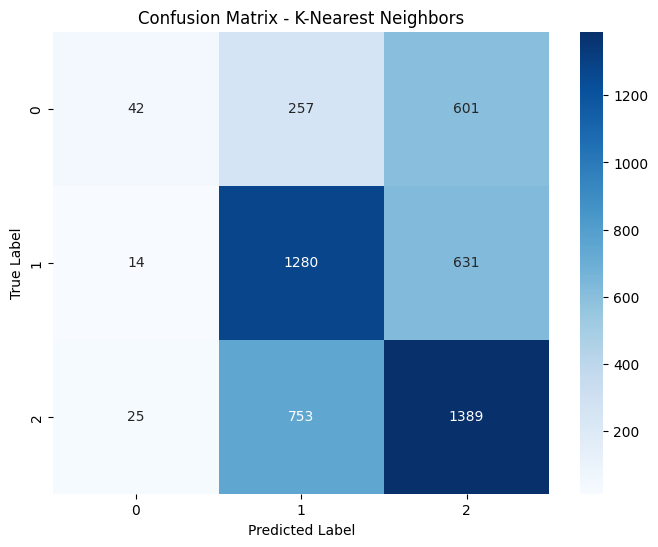

In [23]:
model_name = 'K-Nearest Neighbors'
y_pred = model_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_knn.classes_, yticklabels=model_knn.classes_)
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [24]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)

In [25]:

accuracy_dt = accuracy_score(y_test, y_pred)
accuracy_dt

0.9857772435897436

In [26]:
mse_dt = mean_squared_error(y_test, y_pred)
print(mse_dt)

0.01422275641025641


In [27]:
rmse_dt = np.sqrt(mse_dt)
print(rmse_dt)

0.11925919843037856


In [28]:

y_pred_proba = model_dt.predict_proba(X_test)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(roc_auc_dt)


0.9871456097028527


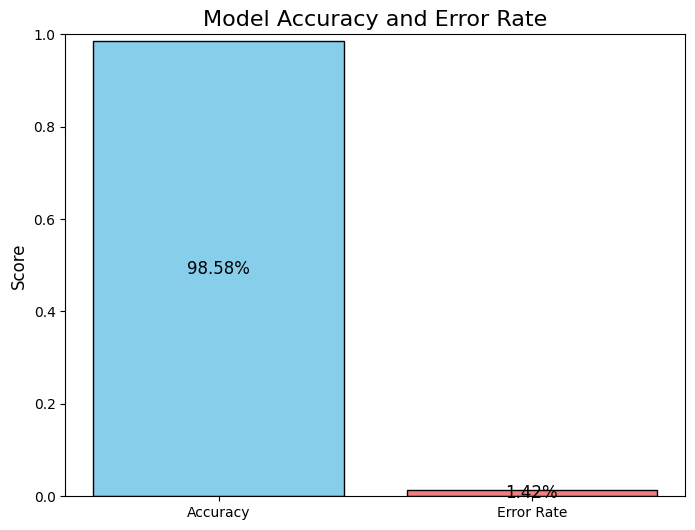

In [29]:
metrics = ['Accuracy', 'Error Rate']
values = [accuracy_dt, mse_dt]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=colors, edgecolor='black')
plt.title('Model Accuracy and Error Rate', fontsize=16)
plt.ylabel('Score', fontsize=12)

for i, value in enumerate(values):
    plt.text(i, value / 2, f'{value:.2%}', ha='center', va='center', fontsize=12, color='black')

plt.ylim(0, 1)
plt.show()

In [30]:
precision_dt = precision_score(y_test, y_pred, average='weighted')
print(precision_dt)

0.9857912367526037


In [31]:
recall_dt = recall_score(y_test, y_pred, average='weighted')
print(recall_dt)

0.9857772435897436


In [32]:
f1_dt = f1_score(y_test, y_pred, average='weighted')
print(f1_dt)

0.9857835305108361


In [33]:
class_report = classification_report(y_test, y_pred)

print("Classification Report:\n")
print(class_report)


Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       900
           1       0.98      0.98      0.98      1925
           2       1.00      1.00      1.00      2167

    accuracy                           0.99      4992
   macro avg       0.98      0.98      0.98      4992
weighted avg       0.99      0.99      0.99      4992



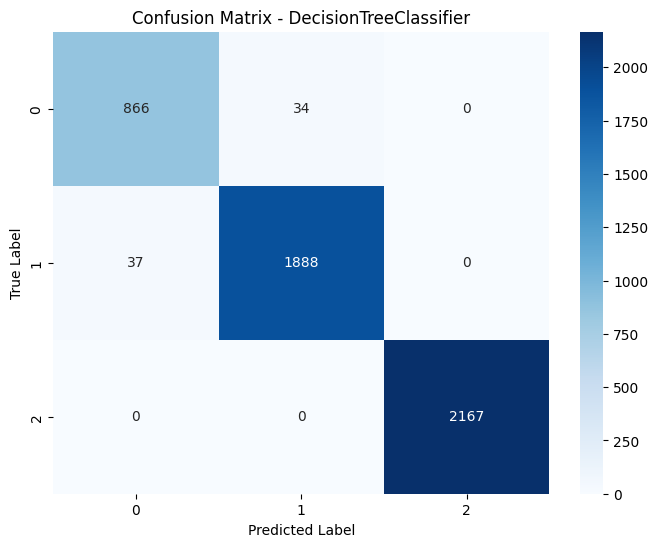

In [34]:
model_name = "DecisionTreeClassifier"
y_pred = model_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_dt.classes_, yticklabels=model_dt.classes_)
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [35]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

In [36]:

accuracy_rf = accuracy_score(y_test, y_pred)
accuracy_rf

0.9925881410256411

In [37]:
mse_rf = mean_squared_error(y_test, y_pred)
print(mse_rf)

0.007411858974358974


In [38]:
rmse_rf = np.sqrt(mse_rf)
print(rmse_rf)

0.08609215396514931


In [39]:
y_pred_proba = model_rf.predict_proba(X_test)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(roc_auc_rf)



0.9991093902781841


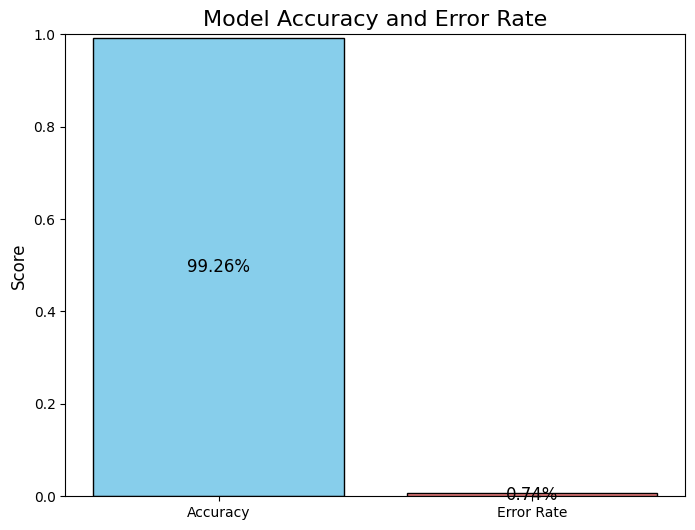

In [40]:
metrics = ['Accuracy', 'Error Rate']
values = [accuracy_rf, mse_rf]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=colors, edgecolor='black')
plt.title('Model Accuracy and Error Rate', fontsize=16)
plt.ylabel('Score', fontsize=12)

for i, value in enumerate(values):
    plt.text(i, value / 2, f'{value:.2%}', ha='center', va='center', fontsize=12, color='black')

plt.ylim(0, 1)
plt.show()

In [41]:
precision_rf = precision_score(y_test, y_pred, average='weighted')
print(precision_rf)

0.9925829856059013


In [42]:
recall_rf = recall_score(y_test, y_pred, average='weighted')
print(recall_rf)

0.9925881410256411


In [43]:
f1_rf = f1_score(y_test, y_pred, average='weighted')
print(f1_rf)

0.9925848396538913


In [44]:
class_report = classification_report(y_test, y_pred)

print("Classification Report:\n")
print(class_report)


Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       900
           1       0.99      0.99      0.99      1925
           2       1.00      1.00      1.00      2167

    accuracy                           0.99      4992
   macro avg       0.99      0.99      0.99      4992
weighted avg       0.99      0.99      0.99      4992



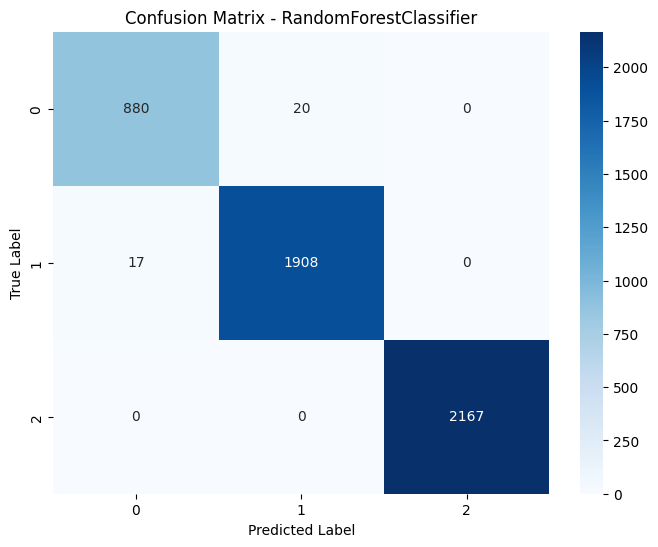

In [45]:
model_name = "RandomForestClassifier"
y_pred = model_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

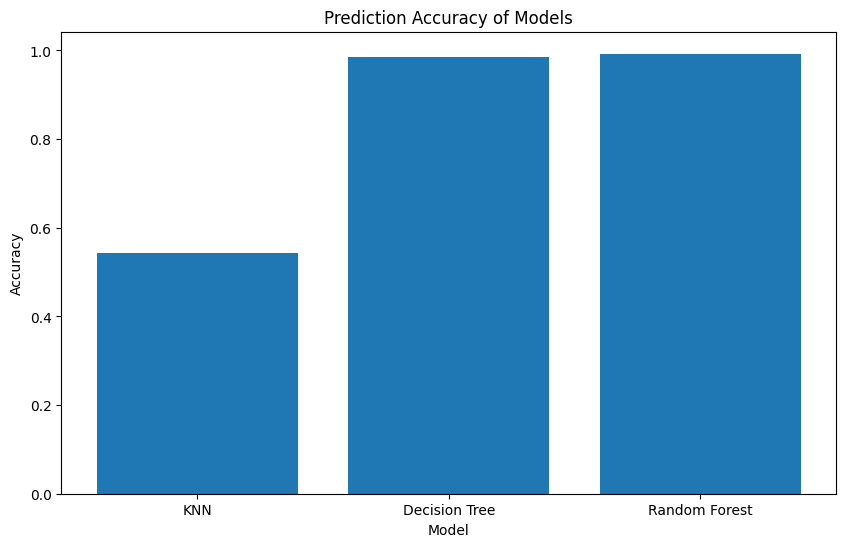

In [46]:


models = {
    'KNN': model_knn,
    'Decision Tree': model_dt,
    'Random Forest': model_rf
}

accuracy_scores = {
    'KNN': accuracy_knn,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf
}

plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.title('Prediction Accuracy of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

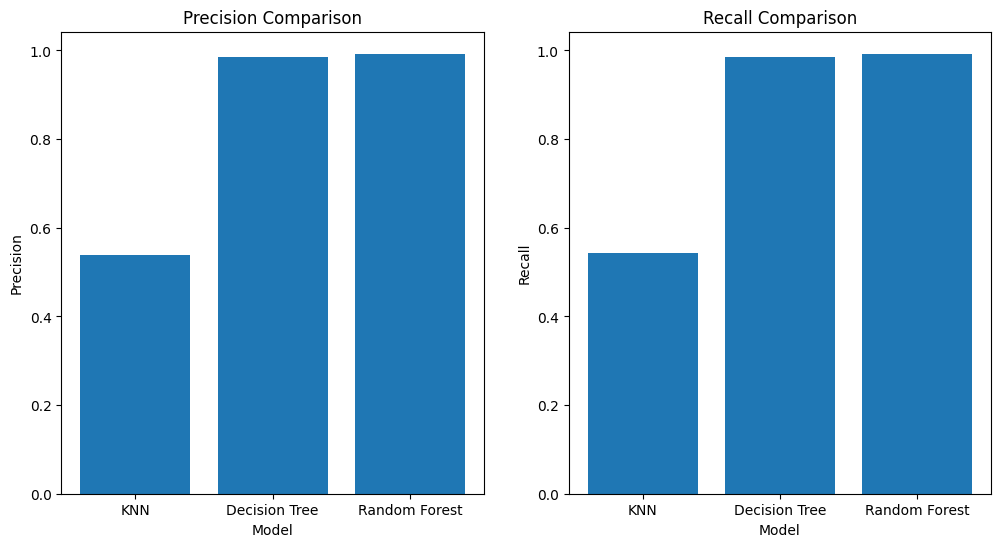

In [47]:
precision_scores = {}
recall_scores = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    precision_scores[model_name] = precision_score(y_test, y_pred, average='weighted')
    recall_scores[model_name] = recall_score(y_test, y_pred, average='weighted')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(precision_scores.keys(), precision_scores.values())
plt.title('Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Precision')

plt.subplot(1, 2, 2)
plt.bar(recall_scores.keys(), recall_scores.values())
plt.title('Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.show()

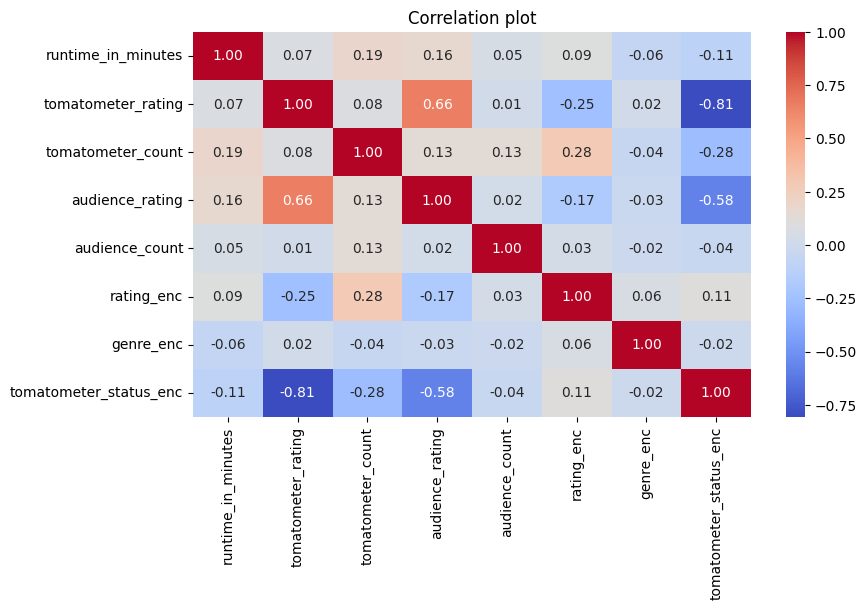

In [48]:
data = data.select_dtypes(include=['float64', 'int64'])

corr_matrx = data.corr()

plt.figure(figsize=(9, 5))
sns.heatmap(corr_matrx, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation plot')
plt.show()


In [49]:
data_corr = data.corr()

data_corr

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,rating_enc,genre_enc,tomatometer_status_enc
runtime_in_minutes,1.000000,0.073035,0.188212,0.163143,0.049345,0.094345,-0.063653,-0.106586
tomatometer_rating,0.073035,1.000000,0.079565,0.656259,0.013913,-0.254260,0.017715,-0.806840
tomatometer_count,0.188212,0.079565,1.000000,0.134545,0.133010,0.280743,-0.044948,-0.275054
audience_rating,0.163143,0.656259,0.134545,1.000000,0.022042,-0.173032,-0.026681,-0.578772
audience_count,0.049345,0.013913,0.133010,0.022042,1.000000,0.028201,-0.022555,-0.041921
rating_enc,0.094345,-0.254260,0.280743,-0.173032,0.028201,1.000000,0.059435,0.107782
genre_enc,-0.063653,0.017715,-0.044948,-0.026681,-0.022555,0.059435,1.000000,-0.015633
tomatometer_status_enc,-0.106586,-0.806840,-0.275054,-0.578772,-0.041921,0.107782,-0.015633,1.000000
